# US Accidents Exploratory Data Analysis

## Information 
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. Currently, there are about 2.8 million accident records in this dataset.

## Acknowledgements
- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.



## Questions

1. Which city in US has reported the most number of accident cases?
2. Which 5 states reported the highest number of accident cases?
3. What time of the day accidents are more frequent in?
4. Which day of the week accidents are more frequent in?
5. Which months have the most accidents?


6. Which timezone reported the most number of accident cases?
7. Which street is most accident prone in US?
8. What is the trend of accidents year over year (decreasing/increasing?)
9. Effects of road condition on the accident cases.
10. How did the weather conditions affected the cases?


In [1]:
pip install -U kaleido --quiet

In [2]:
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [3]:
import plotly.io as pio
pio.renderers.default = "svg"

## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorret values

In [4]:
pip install opendatasets --upgrade --quiet

In [5]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url) 

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [6]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

In [7]:
df = pd.read_csv(data_filename)

In [8]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
# Check the name and the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


- The majority of accidents (> 75%) had a severity rating of ~2, meaning that traffic was not seriously disrupted.
- The accidents occurred despite an average visibility of ~9 miles. This may mean that poor visibility was not the cause of the accidents.
- For about 75% of the accidents, no precipitation was reported. This could mean that rain was not a problem.

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
# Number of numeric columns
len(numeric_df.columns)

14

Percentage of missing values per column

In [12]:
missing_percentage = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentage

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [13]:
missing_percentage = pd.DataFrame(missing_percentage[missing_percentage != 0] * 100).reset_index()
missing_percentage.columns = ['Columns', 'Percentage (%)']

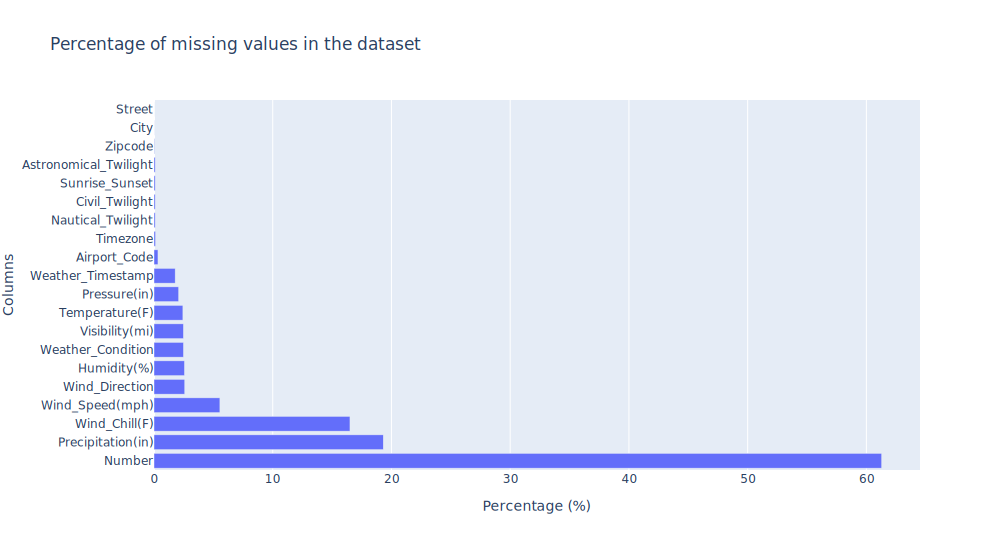

In [58]:
fiq = px.bar(missing_percentage, x='Percentage (%)', y='Columns', title='Percentage of missing values in the dataset')
fiq.show(width=1000, height=550)

- We can see that the Number column has over 60% data missing (61,29003%), Precipitation(in) (19,3%) and Wind_Chill(F) (16,5%) also have over 16% data missing. Since, Number column (which shows the street number) has majority of the data missing, we should drop it.

In [15]:
df = df.drop("Number", axis=1)

## Exploratory Analysis and Visualization

Columns we'll analyze:

1. City
2. State

2. Start Time
3. Start Lat, Start Lng
4. Tempeture
5. Weather Condition

### City

**1. Which city in US has reported the most number of accident cases?**

In [16]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [17]:
cities = df.City.unique()
len(cities)

11682

In [18]:
cities_by_accident = df.City.value_counts()
cities_by_accident = cities_by_accident[cities_by_accident > 15000]

In [19]:
cities_by_accident = pd.DataFrame(cities_by_accident).reset_index()
cities_by_accident.columns = ['City', 'Accidents']

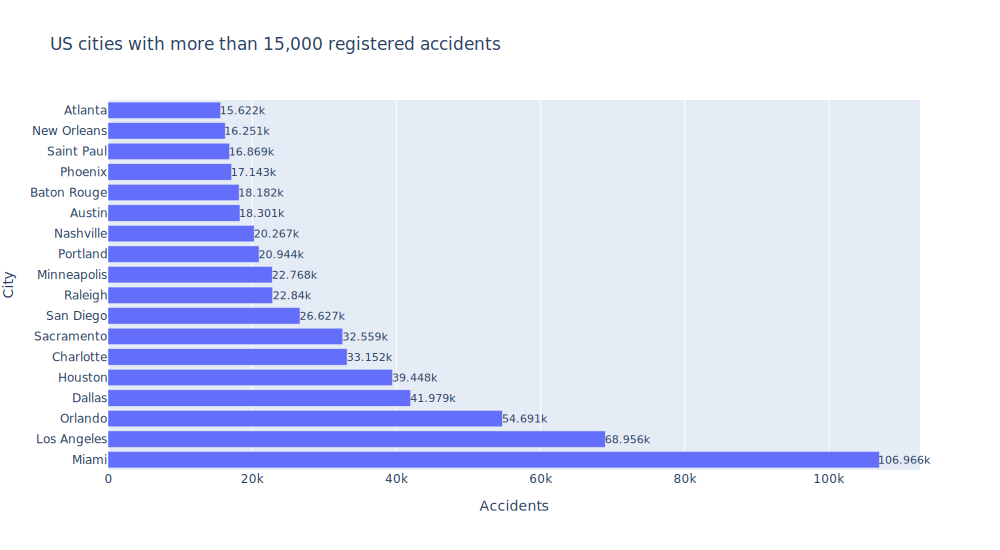

In [51]:
fig = px.bar(cities_by_accident, x='Accidents', y='City', title='US cities with more than 15,000 registered accidents', orientation='h', text_auto='s')
fig.update_traces(textfont_size=11, textangle=0, textposition="outside", cliponaxis=False)
fig.show(width=1000, height=550)

- We can see that Miami had the largest number of accidents (106,966) and Los Angeles is the city with 2nd highest no. of accident cases reported (68,956).
- Miami city reported largest number of accidents. Possibly because more than 1 state has city named Miami.
- One anomaly is that New York didn't report accidents larger than 15,000 from 2016-2020 despite being the most populated city of US (need to investigate).

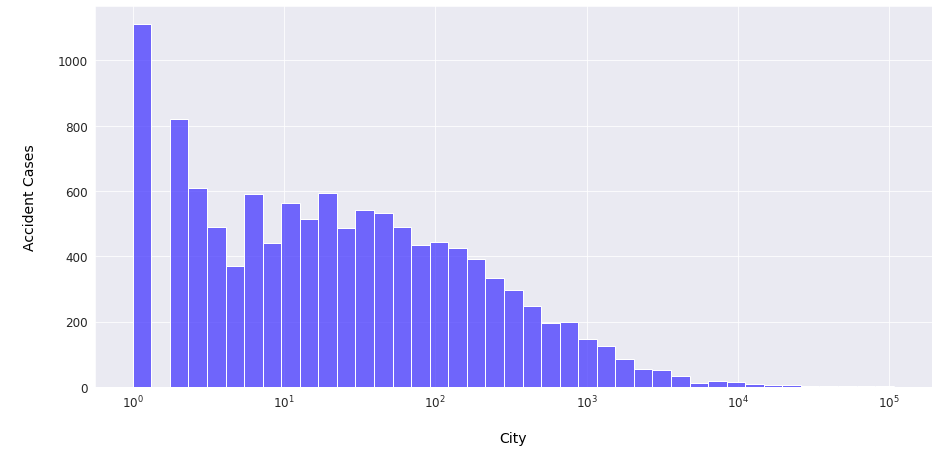

In [21]:
# Lets try to see the distribution of accidents in cities in log scale.
plt.figure(figsize=(15,7))
plt.xlabel('\nCity\n', fontsize=14, color='Black')
plt.ylabel('\nAccident Cases\n', fontsize=14, color='Black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.histplot(df.City.value_counts(), log_scale=True, color='#4638ff')
plt.show()

- The number of accidents in cities are exponentially decreasing. Lots of cities recorded only 1 accident, probably because there is no recorded data.
- We have 1167 cities which recorded only 1 accident case, this is another data source drawback.

### State

**2. Which 5 states reported the highest number of accident cases?**

In [22]:
states_by_accident = df.State.value_counts() 
states_by_accident = states_by_accident[states_by_accident > 50000]

In [23]:
states_by_accident = pd.DataFrame(states_by_accident).reset_index()
states_by_accident.columns = ['State', 'Accidents']

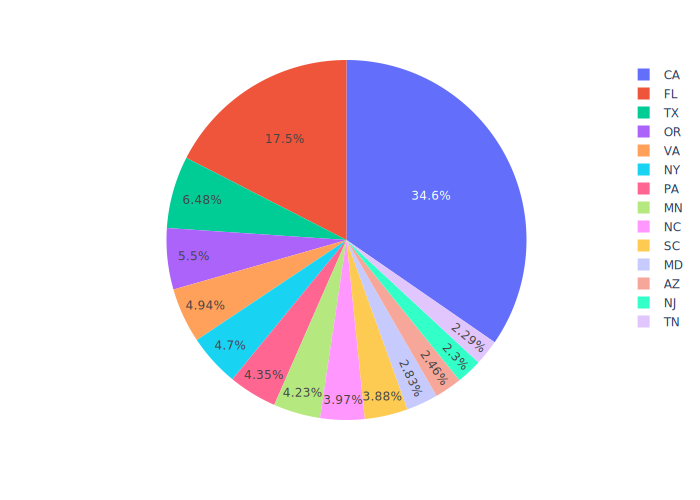

In [24]:
fig = px.pie(states_by_accident, values='Accidents', names='State')
fig.show()

- We see that California (CA) had the most number of accidents, followed by Florida, Oregon, Texas and New york. It appears to be right as California also has the largest population.

### Start Time

**3. What time of the day accidents are more frequent in?**

In [25]:
df.Start_Time[0]

'2016-02-08 00:37:08'

In [26]:
df.Start_Time = pd.to_datetime(df.Start_Time)

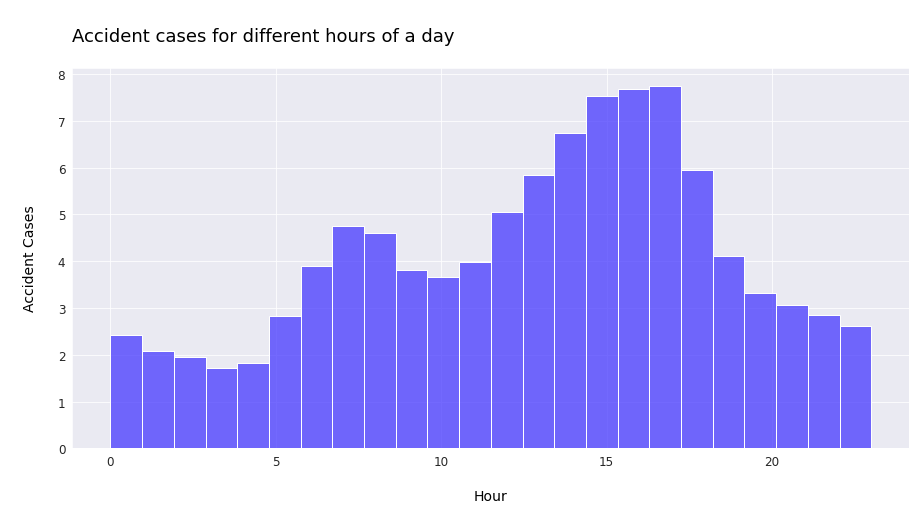

In [27]:
plt.figure(figsize=(15,7))
plt.title('\nAccident cases for different hours of a day\n', size=18, color='Black', loc='left')
plt.xlabel('\nHour\n', fontsize=14, color='Black')
plt.ylabel('\nAccident Cases\n', fontsize=14, color='Black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.histplot(df.Start_Time.dt.hour, bins=24, stat="percent", color='#4638ff')
plt.show()           

- A high percentage of accidents occur between 14 pm to 18 pm.

**4. Which day of the week accidents are more frequent in?**

In [28]:
df.Start_Time.dt.day_name().value_counts()

Friday       492074
Thursday     463477
Wednesday    455037
Tuesday      443968
Monday       419821
Saturday     311691
Sunday       259274
Name: Start_Time, dtype: int64

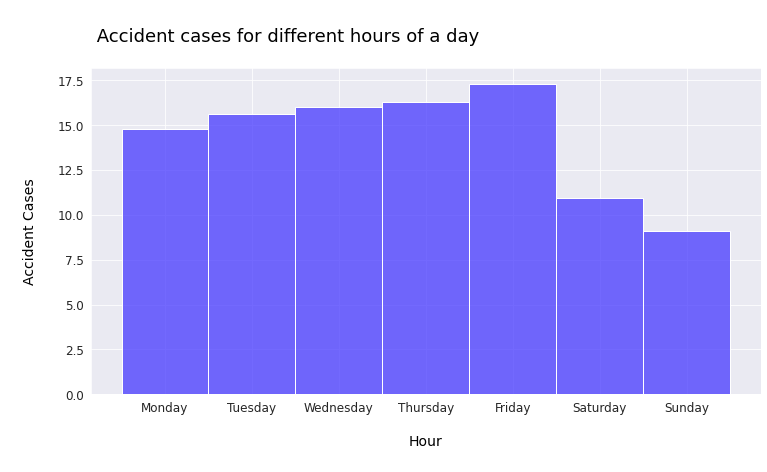

In [49]:
plt.figure(figsize=(12, 6))
plt.title('\n Accident cases for different hours of a day\n', size=18, color='Black', loc='left')
plt.xlabel('\nHour\n', fontsize=14, color='Black')
plt.ylabel('\nAccident Cases\n', fontsize=14, color='Black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.histplot(df.Start_Time.dt.day_name(), bins=7, stat="percent", color='#4638ff')
plt.show()

- Friday reported the highest number of cases.
- It looks like overall it is evenly distributed on the business days.
- Only around 20% of the cases were reported on weekends. Probably because of low vehichles on road?

Let's see how accidents break down at different hours of the day during the week

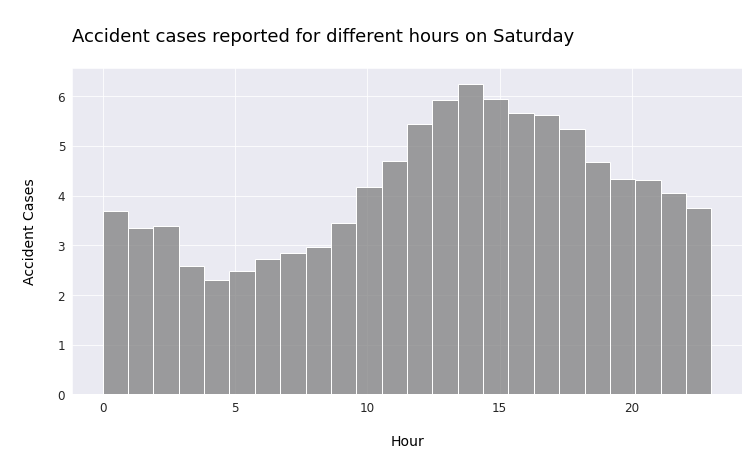

In [42]:
saturday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
plt.figure(figsize=(12, 6))
plt.title('\nAccident cases reported for different hours on Saturday\n', size=18, color='Black', loc='left')
plt.xlabel('\nHour\n', fontsize=14, color='Black')
plt.ylabel('\nAccident Cases\n', fontsize=14, color='Black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.histplot(saturday_start_time.dt.hour, bins=24, stat="percent", color='grey')
plt.show()

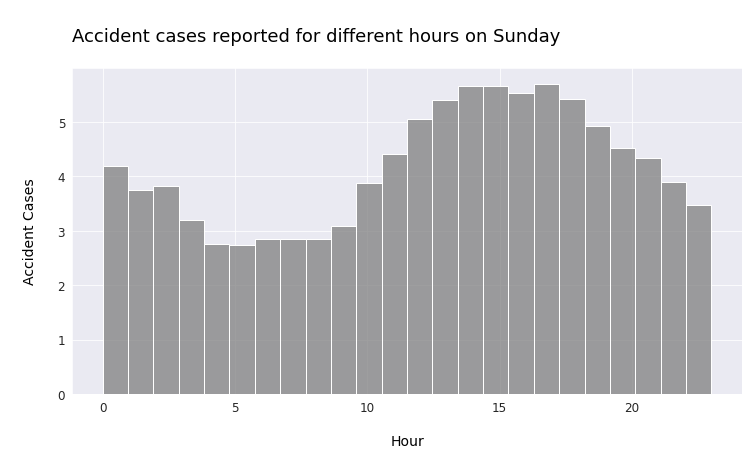

In [44]:
saturday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
plt.figure(figsize=(12, 6))
plt.title('\nAccident cases reported for different hours on Sunday\n', size=18, color='Black', loc='left')
plt.xlabel('\nHour\n', fontsize=14, color='Black')
plt.ylabel('\nAccident Cases\n', fontsize=14, color='Black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.histplot(saturday_start_time.dt.hour, bins=24, stat="percent", color='grey')
plt.show()

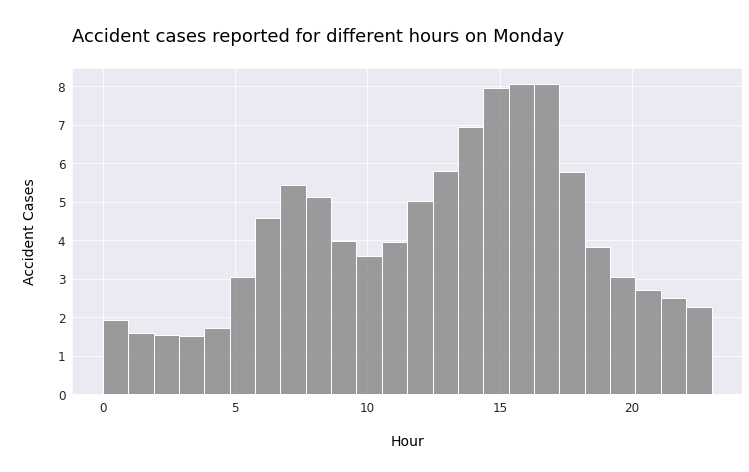

In [48]:
saturday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
plt.figure(figsize=(12, 6))
plt.title('\nAccident cases reported for different hours on Monday\n', size=18, color='Black', loc='left')
plt.xlabel('\nHour\n', fontsize=14, color='Black')
plt.ylabel('\nAccident Cases\n', fontsize=14, color='Black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.histplot(saturday_start_time.dt.hour, bins=24, stat="percent", color='grey')
plt.show()

- On Saturdays and Sundays, the peak occurs between 10 am and 17 pm, unlike weekday.
- On the weekends, the distribution of accidents taking place over the day looks very different from that of on weekdays. It is more distributed through out the day, instead of peaking at a specific hour range.

**5. Which months have the most accidents?**

In [33]:
import calendar
month = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().sort_values('index')
month.columns = ['Month', 'Accidents']
month_names = list(calendar.month_name)[1:]
month.Month = month_names

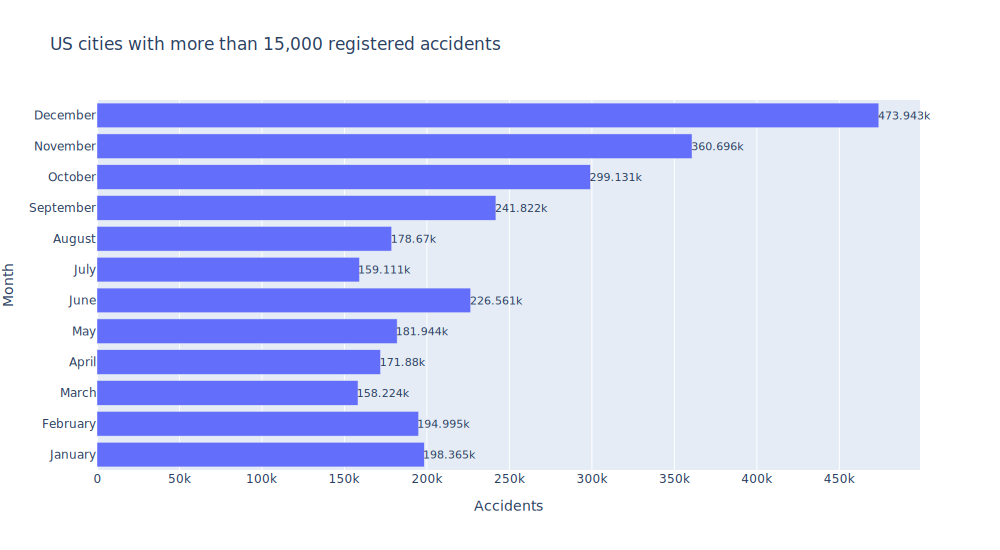

In [59]:
fig = px.bar(month, x='Accidents', y='Month', title='US cities with more than 15,000 registered accidents', orientation='h', text_auto='s')
fig.update_traces(textfont_size=11, textangle=0, textposition="outside", cliponaxis=False)
fig.show(width=1000, height=550)

- Around 17% of the road accidents occurred in the month of December.
- March is month with least (158,224) no. of road accidents in US.
- 45% of the road accidents occurred only within the 3 months, October to December.

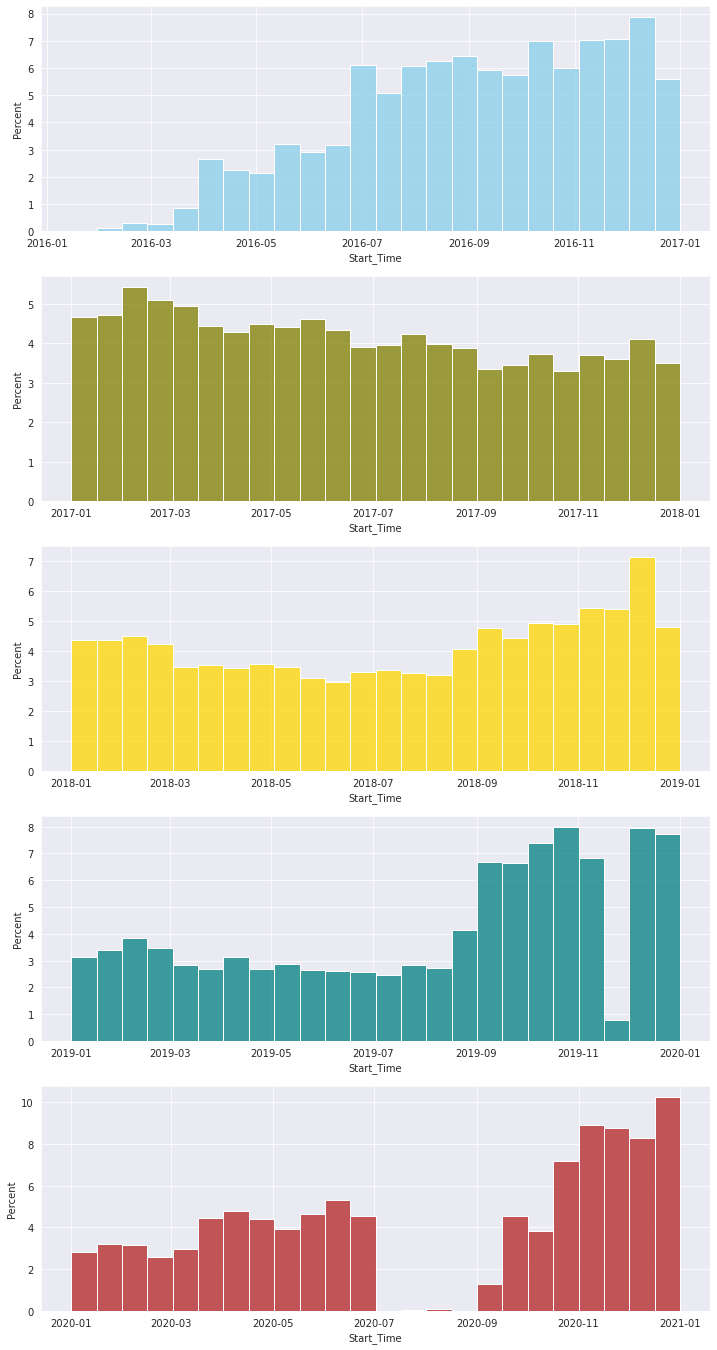

In [55]:
df_2016 = df.Start_Time[df.Start_Time.dt.year == 2016]
df_2017 = df.Start_Time[df.Start_Time.dt.year == 2017]
df_2018 = df.Start_Time[df.Start_Time.dt.year == 2018]
df_2019 = df.Start_Time[df.Start_Time.dt.year == 2019]
df_2020 = df.Start_Time[df.Start_Time.dt.year == 2020]

fig, axs = plt.subplots(5, 1, figsize=(12, 24))

sns.histplot(data=df_2016, bins=24, stat="percent", color="skyblue", ax=axs[0])
sns.histplot(data=df_2017, bins=24, stat="percent", color="olive", ax=axs[1])
sns.histplot(data=df_2018, bins=24, stat="percent", color="gold", ax=axs[2])
sns.histplot(data=df_2019, bins=24, stat="percent", color="teal", ax=axs[3])
sns.histplot(data=df_2020, bins=24, stat="percent", color="FireBrick", ax=axs[4])

plt.show()

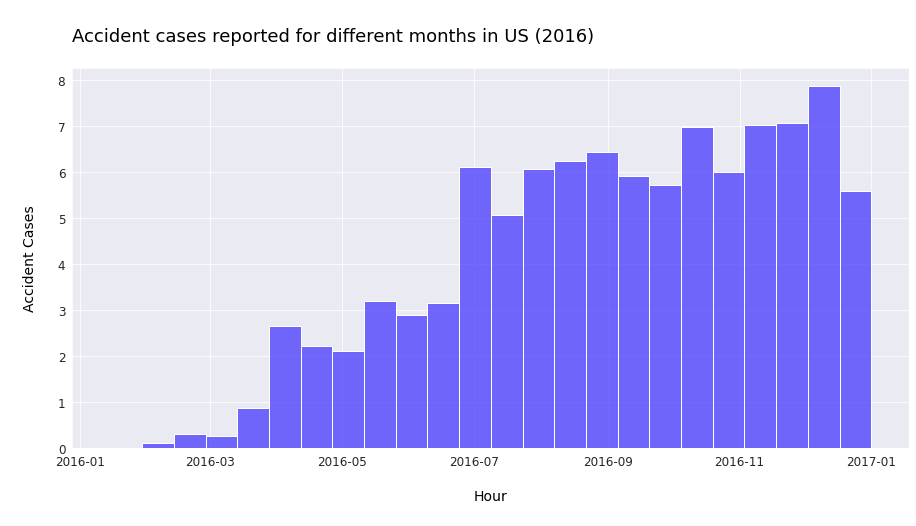

In [36]:
df_2016 = df.Start_Time[df.Start_Time.dt.year == 2016]
plt.figure(figsize=(15,7))
plt.title('\nAccident cases reported for different months in US (2016)\n', size=18, color='Black', loc='left')
plt.xlabel('\nHour\n', fontsize=14, color='Black')
plt.ylabel('\nAccident Cases\n', fontsize=14, color='Black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.histplot(df_2016, bins=24, stat="percent", color='#4638ff')
plt.show()

- Much data is missing for 2016. Maybe even 2017.

## Start Latitude & Longitude

In [56]:
sample_df = df.sample(int(0.5 * len(df)))

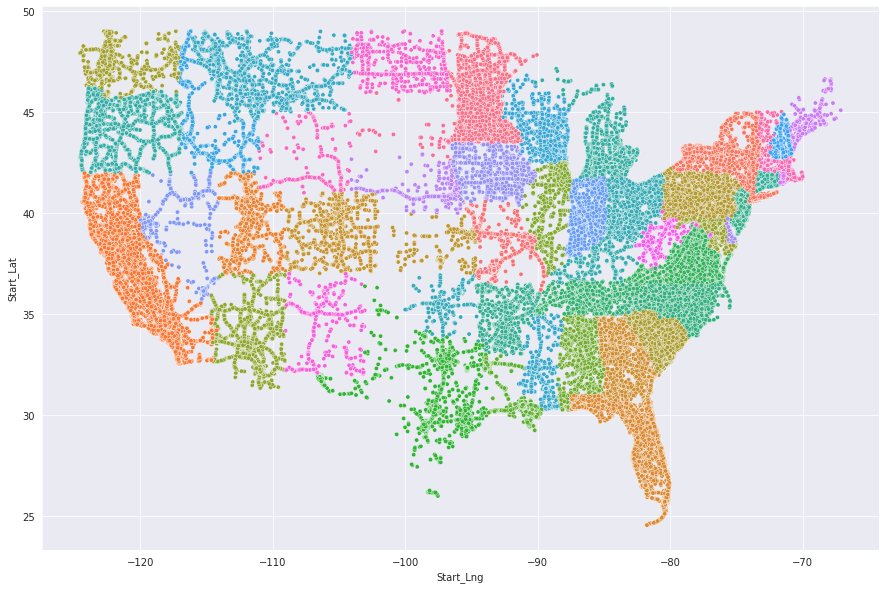

In [57]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, hue=sample_df.State, size=0.001, legend=False)

- Even though this graph can shows the distribution of the accidents in each state, it does not clearly shows the clusters.

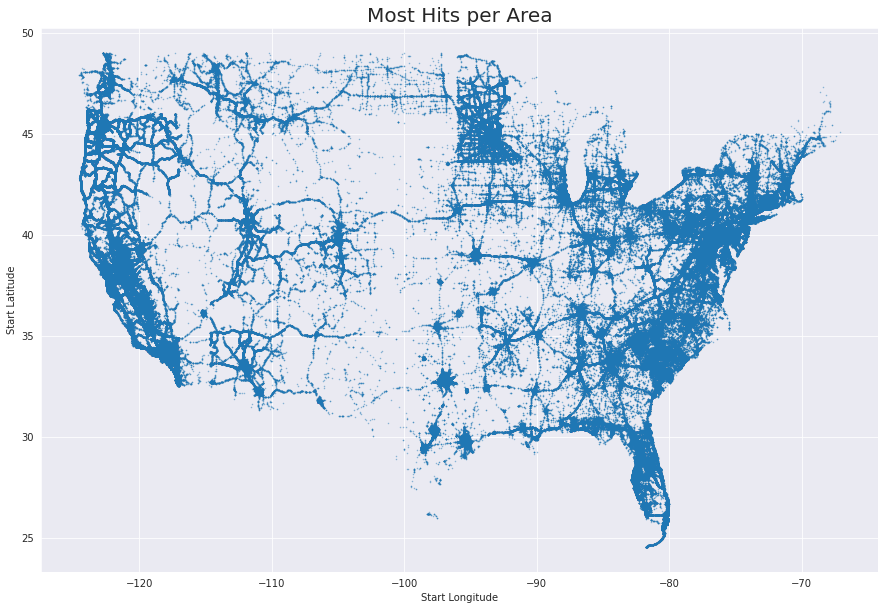

In [39]:
# If we remove 'hue'=State, we can observe which areas and which roads have more accidents than the others
plt.figure(figsize=(15,10))
plt.title('Most Hits per Area', fontsize=20)
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.plot(df.Start_Lng, df.Start_Lat, ".", alpha=0.5, ms=1)
plt.show()

- The graph above shows all the accidents in the USA, and we can easily see that the accidents are clustered in metropolitan areas and major highways. However, it does not indicate the severity of accidents.

In [40]:
sample_df = df.sample(int(0.01 * len(df)))
lat_lon_pairs = zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng))

In [41]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Summary and Conclusion 

Insights:
- The majority of accidents (> 75%) had a severity rating of ~2, meaning that traffic was not seriously disrupted.
- The accidents occurred despite an average visibility of ~9 miles. This may mean that poor visibility was not the cause of the accidents.
- For about 75% of the accidents, no precipitation was reported. This could mean that rain was not a problem.
- We can see that the Number column has over 60% data missing (61,29003%), Precipitation(in) (19,3%) and Wind_Chill(F) (16,5%) also have over 16% data missing. Since, Number column (which shows the street number) has majority of the data missing, we should drop it.
- We can see that Miami had the largest number of accidents (106,966) and Los Angeles is the city with 2nd highest no. of accident cases reported (68,956).
- Miami city reported largest number of accidents. Possibly because more than 1 state has city named Miami.
- One anomaly is that New York didn't report accidents larger than 15,000 from 2016-2020 despite being the most populated city of US (need to investigate).
- The number of accidents in cities are exponentially decreasing. Lots of cities recorded only 1 accident, probably because there is no recorded data.
- We have 1167 cities which recorded only 1 accident case, this is another data source drawback.
- We see that California (CA) had the most number of accidents, followed by Florida, Oregon, Texas and New york. It appears to be right as California also has the largest population.
- A high percentage of accidents occur between 14 pm to 18 pm.
- Friday reported the highest number of cases.
- It looks like overall it is evenly distributed on the business days.
- Only around 20% of the cases were reported on weekends. Probably because of low vehichles on road?
- On Saturdays and Sundays, the peak occurs between 10 am and 17 pm, unlike weekday.
- On the weekends, the distribution of accidents taking place over the day looks very different from that of on weekdays. It is more distributed through out the day, instead of peaking at a specific hour range.
- Around 17% of the road accidents occurred in the month of December.
- March is month with least (158,224) no. of road accidents in US.
- 45% of the road accidents occurred only within the 3 months, October to December.
- Much data is missing for 2016. Maybe even 2017.
- All the accidents in the USA, and we can easily see that the accidents are clustered in metropolitan areas and major highways. However, it does not indicate the severity of accidents.
